# **Dataset:** [Multi-Class Prediction of Obesity Risk Dataset](https://www.kaggle.com/competitions/playground-series-s4e2)

## **Questions to answer:**
- (Classification) How important is each variable in predicting an individual’s risk of having cardiovascular disease?
- (Classification) Is there a way to categorise individuals' level of obesity based on information about health and daily habits?

## **IMPORT NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## **IMPORT DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
train_set = "/content/drive/MyDrive/Colab Notebooks/train.csv"
data = pd.read_csv(train_set)
data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


*Quick overview*

In [ ]:
display('Data set:', data.head())

'Train set:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


*Data description:*

| Abbreviation   | Full Form                                 |
|:---------------|:------------------------------------------|
| FAVC           | Frequent consumption of high caloric food |
| FCVC           | Frequency of consumption of vegetables    |
| NCP            | Number of main meals                      |
| CAEC           | Consumption of food between meals         |
| CH20           | Consumption of water daily                |
| CALC           | Consumption of alcohol                    |
| SCC            | Calories consumption monitoring           |
| FAF            | Physical activity frequency               |
| TUE            | Time using technology devices             |
| MTRANS         | Transportation used                       |
| NObeyesdad     | Body mass index                           |

## **DATA PREPARATION**

### **DATA CLEANING**

#### > CHECK FOR NULL VALUES

In [ ]:
if data.isnull().any().any():
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")

There are no null values in the DataFrame.


#### > DROP REDUNDANT AND DUPLICATE FEATURES

In [ ]:
data.drop(columns=['id'], axis=1,  inplace=True)

data.drop_duplicates()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


### **FEATURES EDITION**

#### > CLASSIFY GROUP AGE

In [ ]:
# Classify Group Age
age = data['Age']
def age2group(age):
    if age < 20:
        age = 'Under 20'
    elif age >= 50:
        age = 'Above 50'
    else:
        lowerbound = int(age / 10) * 10
        upperbound = (int(age / 10) + 1) * 10 - 1
        age = str(lowerbound) + '-' + str(upperbound)
    return age
data['Age'] = age.apply(age2group)

#### > ROUND VALUES

In [ ]:
#Round values of each column to the appropriate decimal places
data['FCVC'] = data['FCVC'].round(1)
data['NCP'] = data['NCP'].round(1)
data['FAF'] = data['FAF'].round(2)
data['Height'] = data['Height'].round(2)
data['Weight'] = data["Weight"].round(1)
data['TUE'] = data['TUE'].round(2)
data['CH2O'] = data['CH2O'].round(2)

#Abbreviate features
data.rename(columns={'family_history_with_overweight': 'FHWO'}, inplace=True)

#Print dataset
data

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,20-29,1.70,81.7,yes,yes,2.0,3.0,Sometimes,no,2.76,no,0.00,0.98,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,Under 20,1.56,57.0,yes,yes,2.0,3.0,Frequently,no,2.00,no,1.00,1.00,no,Automobile,Normal_Weight
2,Female,Under 20,1.71,50.2,yes,yes,1.9,1.4,Sometimes,no,1.91,no,0.87,1.67,no,Public_Transportation,Insufficient_Weight
3,Female,20-29,1.71,131.3,yes,yes,3.0,3.0,Sometimes,no,1.67,no,1.47,0.78,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,30-39,1.91,93.8,yes,yes,2.7,2.0,Sometimes,no,1.98,no,1.97,0.93,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,20-29,1.77,114.2,yes,yes,2.9,3.0,Sometimes,no,2.15,no,1.33,0.20,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,Under 20,1.71,50.0,no,yes,3.0,4.0,Frequently,no,1.00,no,2.00,1.00,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20-29,1.82,105.6,yes,yes,2.4,3.0,Sometimes,no,2.00,no,1.16,1.20,no,Public_Transportation,Obesity_Type_II
20756,Male,30-39,1.70,83.5,yes,yes,2.7,2.0,Sometimes,no,2.14,no,0.00,0.97,no,Automobile,Overweight_Level_II


#### > ADDING AND CALCULATING BMI
Here we add a new feature 'BMI', which is calculated as 'Weight' / ('Height' ^ 2).

In [ ]:
# Calculating Body Mass Index (BMI) + round to 2 decimal numbers
data['BMI'] = (data['Weight']/((data['Height'])**2)).round(2)

#### > REORDERING COLUMNS

In [ ]:
data.columns[:]
data = data[['Gender', 'Age', 'Height', 'Weight', 'BMI', 'FHWO', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']]
data

,Gender,Age,Height,Weight,BMI,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,20-29,1.70,81.7,28.27,yes,yes,2.0,3.0,Sometimes,no,2.76,no,0.00,0.98,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,Under 20,1.56,57.0,23.42,yes,yes,2.0,3.0,Frequently,no,2.00,no,1.00,1.00,no,Automobile,Normal_Weight
2,Female,Under 20,1.71,50.2,17.17,yes,yes,1.9,1.4,Sometimes,no,1.91,no,0.87,1.67,no,Public_Transportation,Insufficient_Weight
3,Female,20-29,1.71,131.3,44.90,yes,yes,3.0,3.0,Sometimes,no,1.67,no,1.47,0.78,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,30-39,1.91,93.8,25.71,yes,yes,2.7,2.0,Sometimes,no,1.98,no,1.97,0.93,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,20-29,1.77,114.2,36.45,yes,yes,2.9,3.0,Sometimes,no,2.15,no,1.33,0.20,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,Under 20,1.71,50.0,17.10,no,yes,3.0,4.0,Frequently,no,1.00,no,2.00,1.00,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20-29,1.82,105.6,31.88,yes,yes,2.4,3.0,Sometimes,no,2.00,no,1.16,1.20,no,Public_Transportation,Obesity_Type_II
20756,Male,30-39,1.70,83.5,28.89,yes,yes,2.7,2.0,Sometimes,no,2.14,no,0.00,0.97,no,Automobile,Overweight_Level_II


## **DATA VISUALIZATION**

#### > EXTRACT NUMERIC VALUES

In [ ]:
# Extract only the numeric data variables
dataset_num = data.select_dtypes(include='number')

# Summary Statistics for all Variables
dataset_num.describe()

,Height,Weight,BMI,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,1.700085,87.886863,30.249213,2.445900,2.761923,2.029422,0.981811,0.616697
std,0.087515,26.378747,8.342507,0.533524,0.705720,0.608512,0.838335,0.602135
min,1.450000,39.000000,12.870000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.630000,66.000000,24.090000,2.000000,3.000000,1.790000,0.010000,0.000000
50%,1.700000,84.100000,29.380000,2.400000,3.000000,2.000000,1.000000,0.570000
75%,1.760000,111.600000,37.090000,3.000000,3.000000,2.550000,1.590000,1.000000
max,1.980000,165.100000,55.160000,3.000000,4.000000,3.000000,3.000000,2.000000


0 Height
1 Weight
2 BMI
3 FCVC
4 NCP
5 CH2O
6 FAF
7 TUE


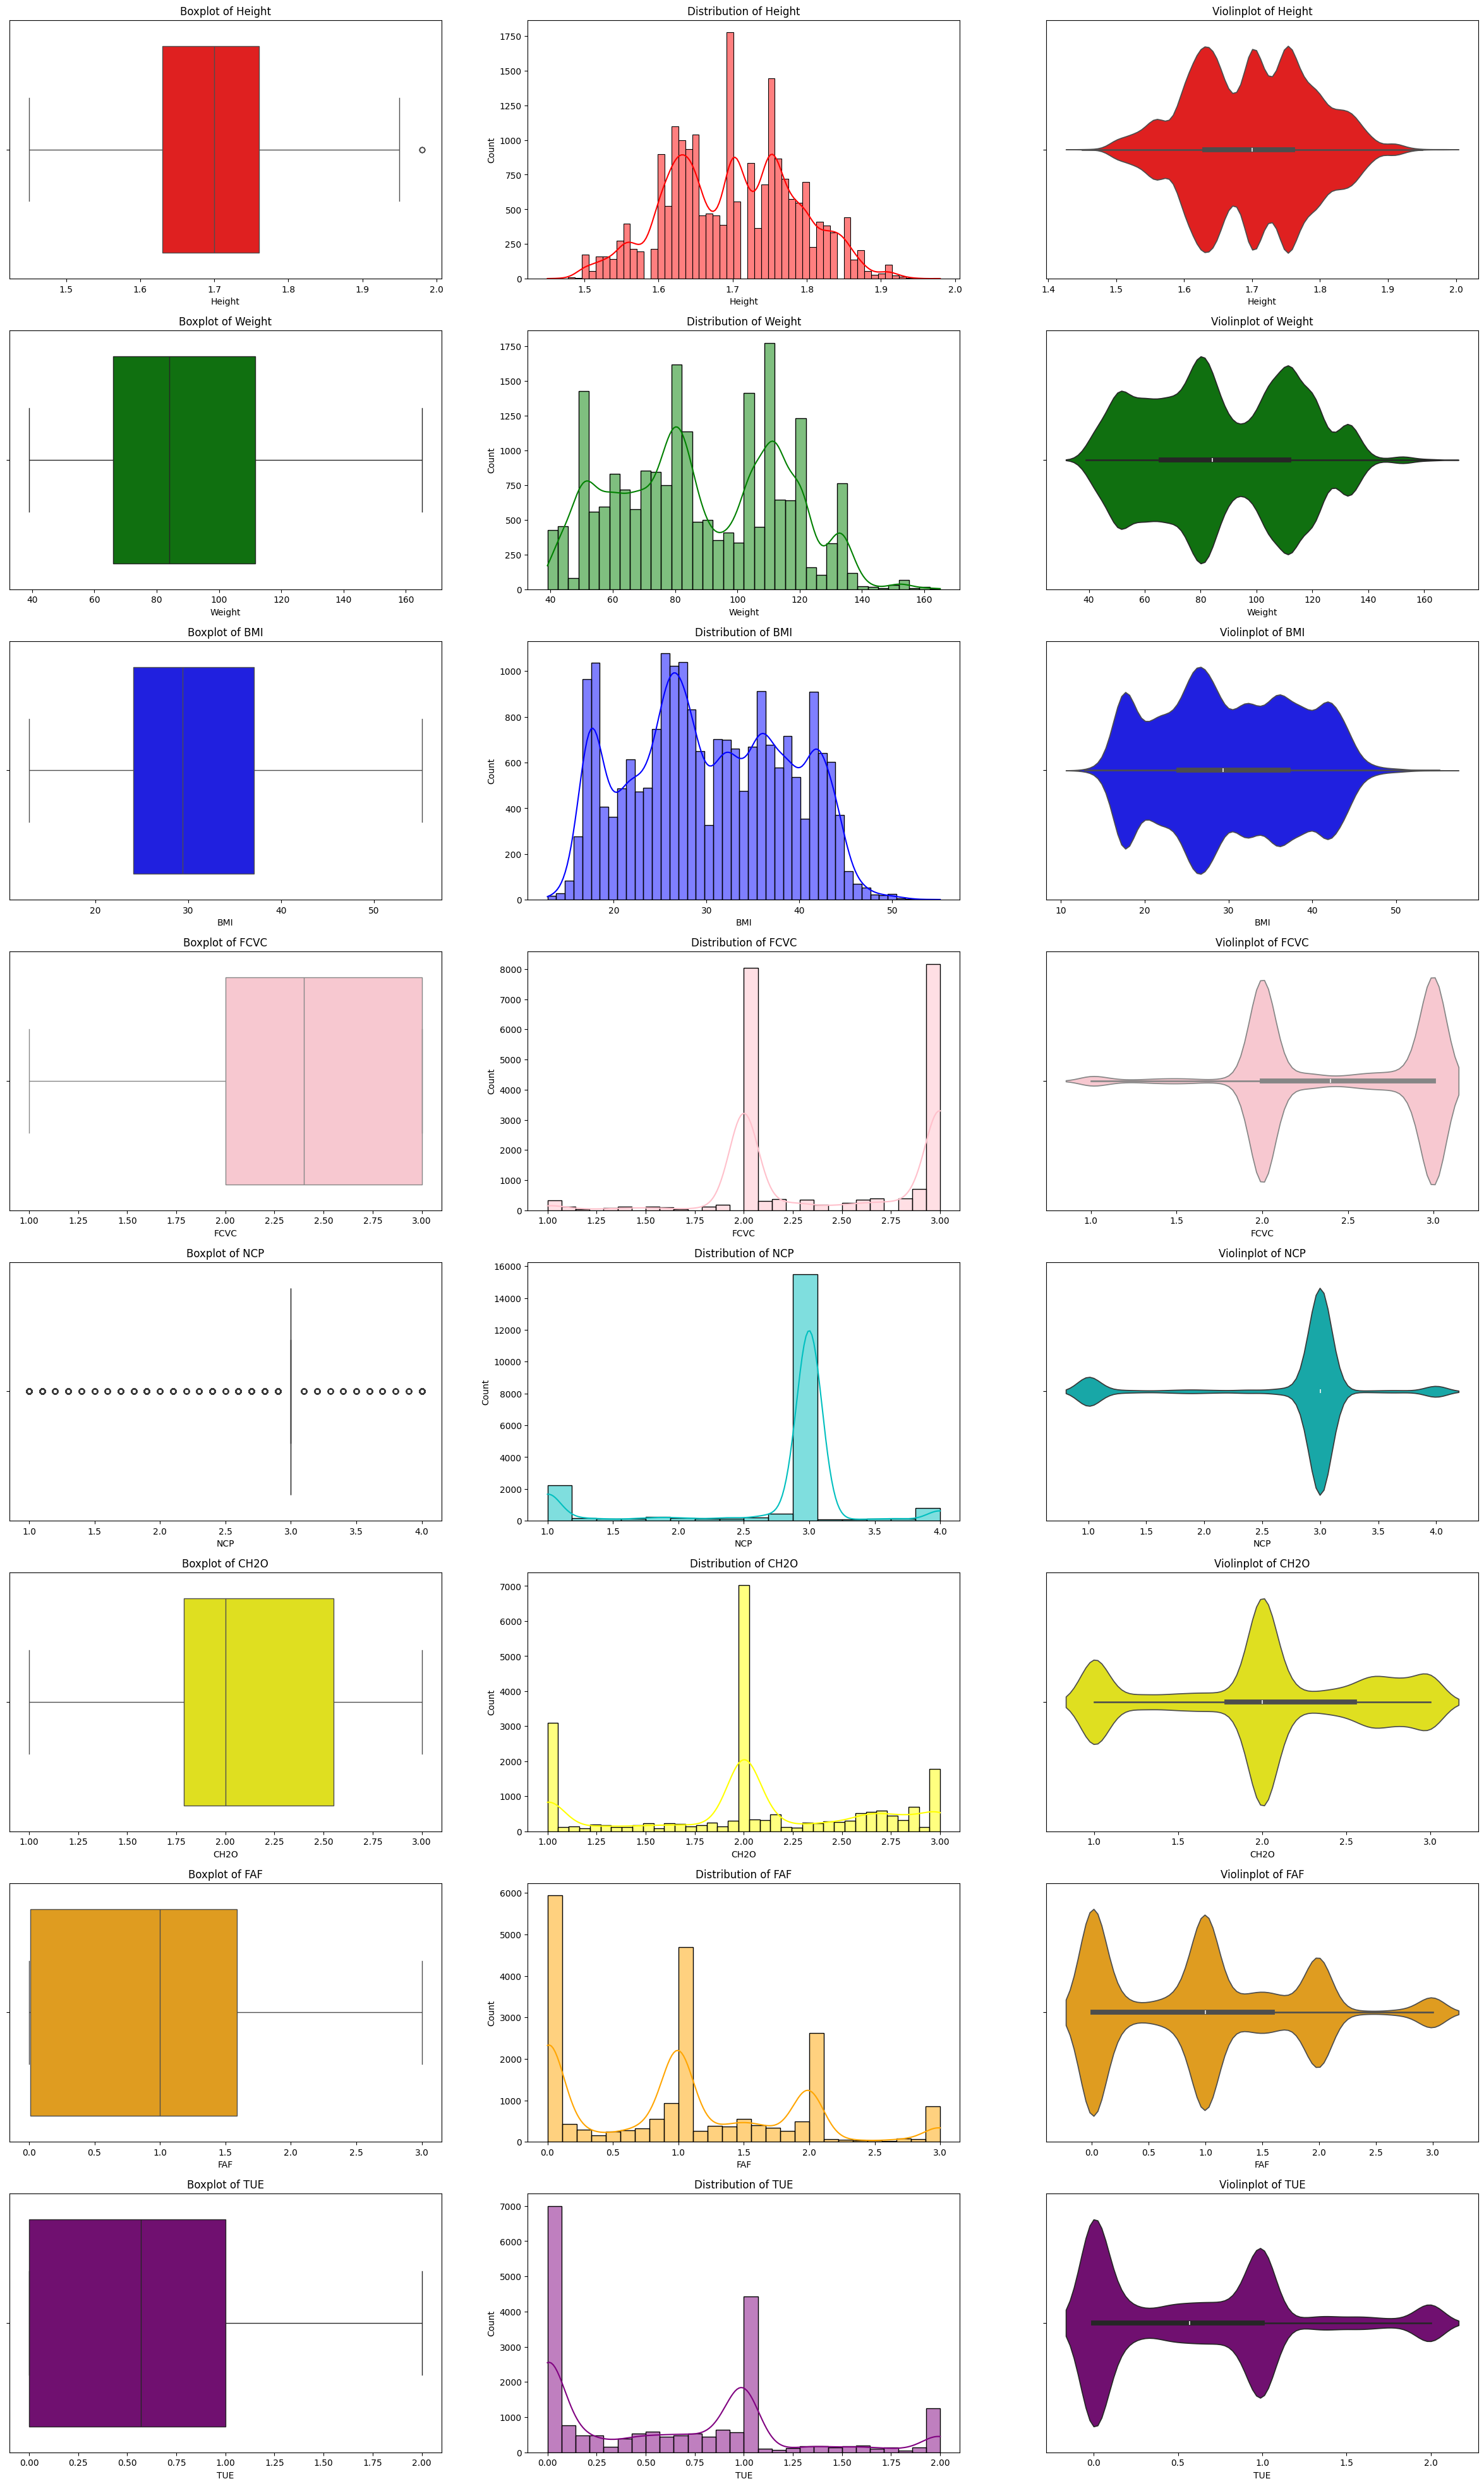

In [ ]:
#Create boxplot, kde plot, and violin plot for each numeric features
f, axes = plt.subplots(len(dataset_num.columns), 3, figsize=(30, 50))
colors = ["red", "green", "blue", "pink", "c" , "yellow", "orange", "purple"]
for i, var in enumerate(dataset_num.columns):
    sb.boxplot(data = dataset_num[var], orient = "h", color = colors[i], ax = axes[i,0])
    axes[i,0].set_title(f'Boxplot of {var}')
    sb.histplot(data = dataset_num[var], kde = True, color = colors[i], ax = axes[i,1])
    axes[i,1].set_title(f'Distribution of {var}')
    sb.violinplot(data = dataset_num[var], orient = "h", color = colors[i], ax = axes[i,2])
    axes[i,2].set_title(f'Violinplot of {var}')
    print(i, var)

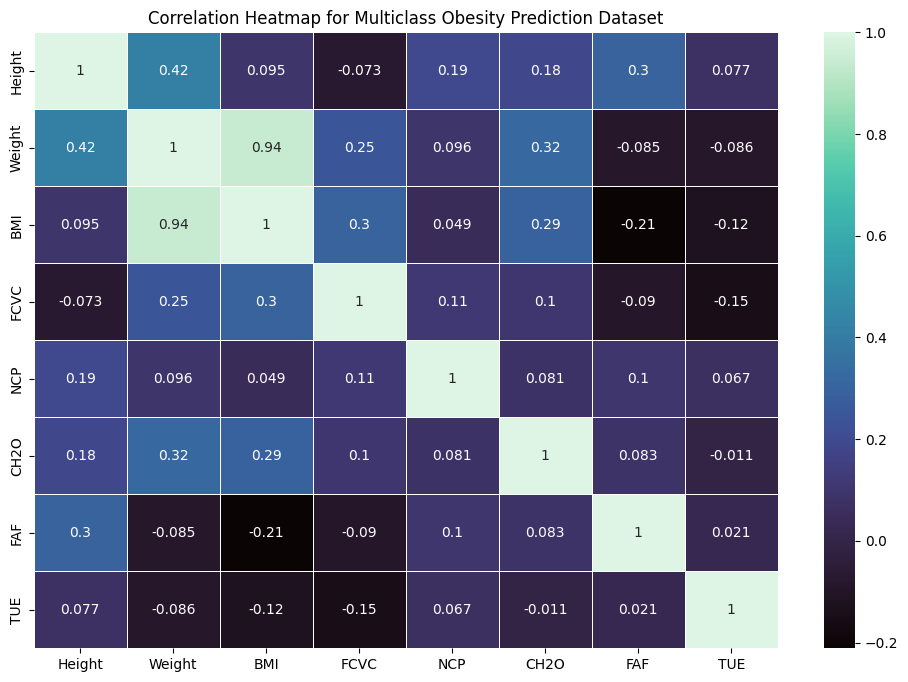

In [ ]:
# Create a heatmap to visualize the correlations between numeric data variables
plt.figure(figsize=(12, 8))
sb.heatmap(dataset_num.corr(), annot=True, cmap="mako", linewidths=0.5)
plt.title("Correlation Heatmap for Multiclass Obesity Prediction Dataset")
plt.show()

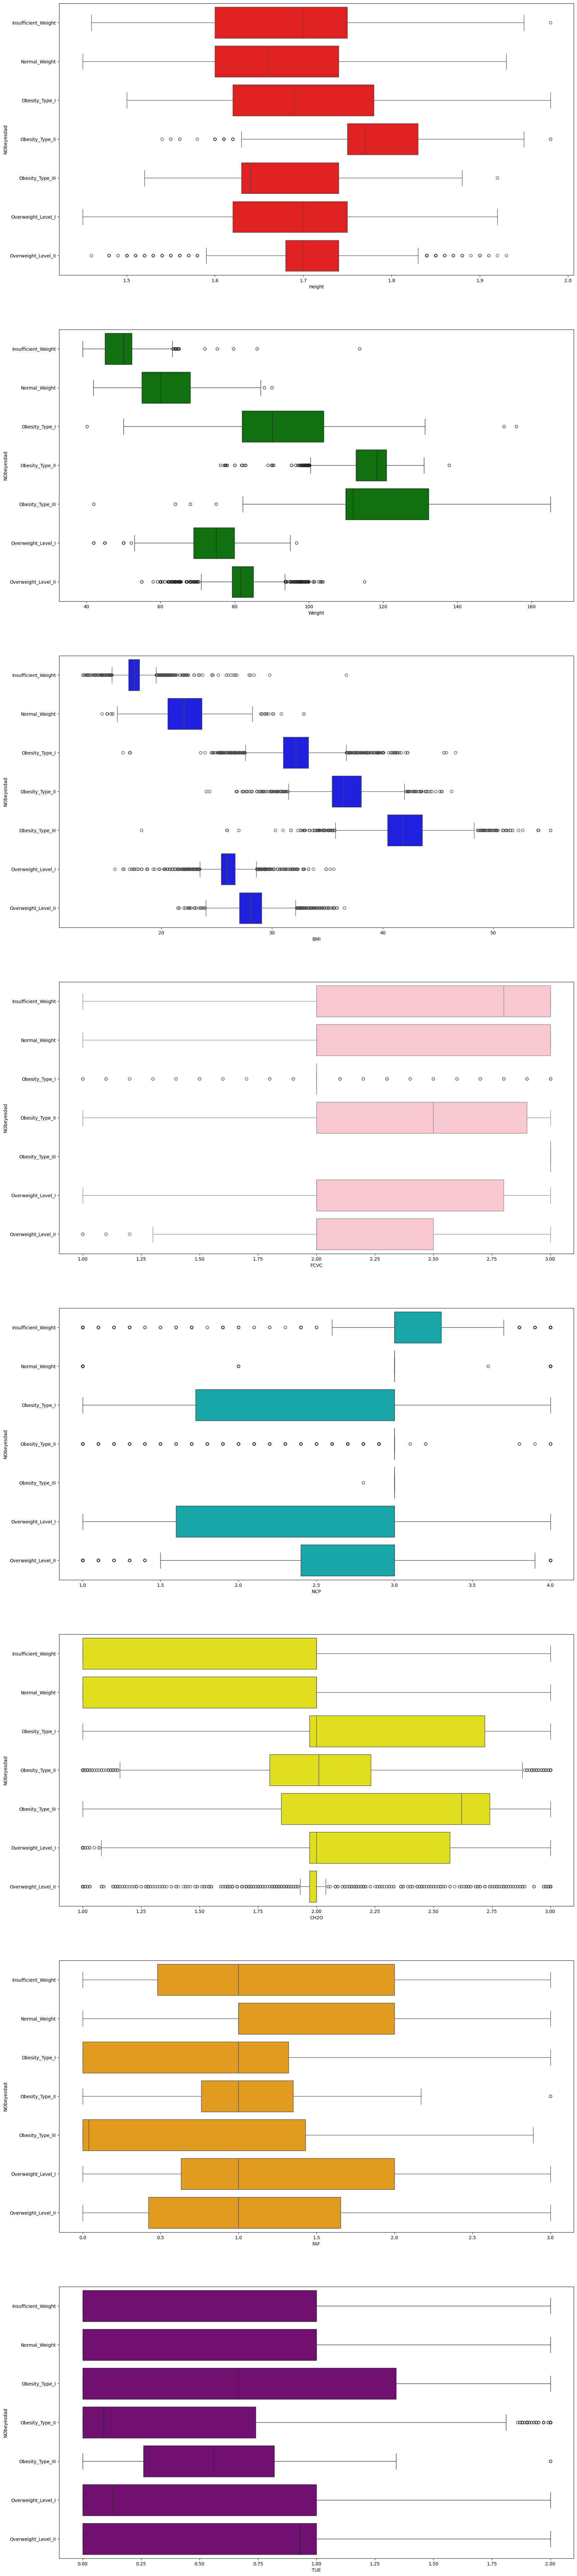

In [ ]:
dataset_plot = dataset_num.copy()
dataset_plot_df = pd.DataFrame(dataset_plot)
dataset_plot_df['NObeyesdad'] = pd.Categorical(data['NObeyesdad'])

# Boxplots for the Features against the Clusters
f, axes = plt.subplots(len(dataset_plot_df.columns) - 1, 1, figsize=(20,100))
colors = ["red", "green", "blue", "pink", "c" , "yellow", "orange", "purple"]
for i, var in enumerate(dataset_plot_df.columns[0:-1]):
    sb.boxplot(x = var, y = 'NObeyesdad', data = dataset_plot_df, ax = axes[i], color = colors[i])

Number of Levels of Obesity : 7
NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


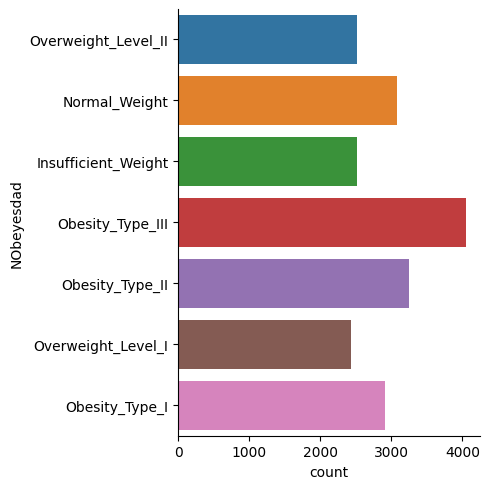

In [ ]:
# Levels of Obesity in the Dataset
print("Number of Levels of Obesity :", len(data["NObeyesdad"].unique()))

# Count the number of people in each level of obesity
print(data["NObeyesdad"].value_counts())
sb.catplot(y = "NObeyesdad", data = data, hue=data['NObeyesdad'], kind = "count")

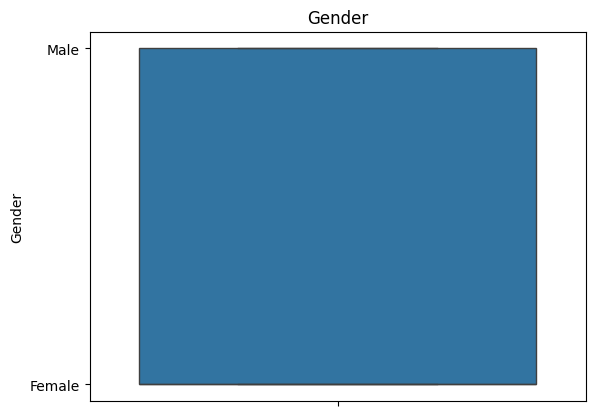

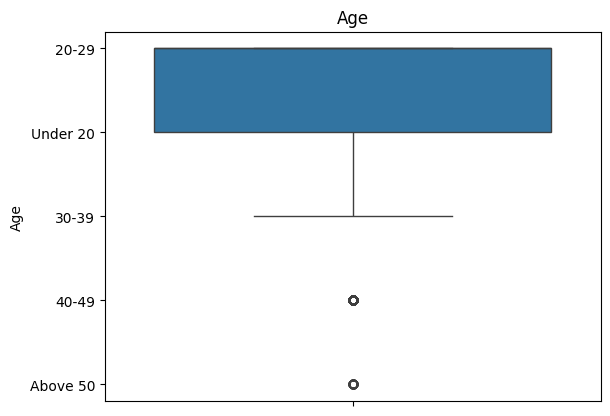

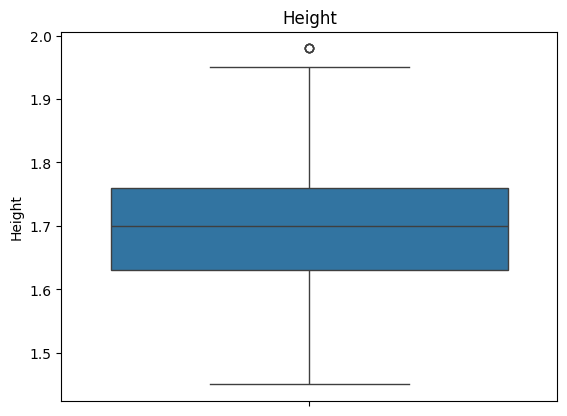

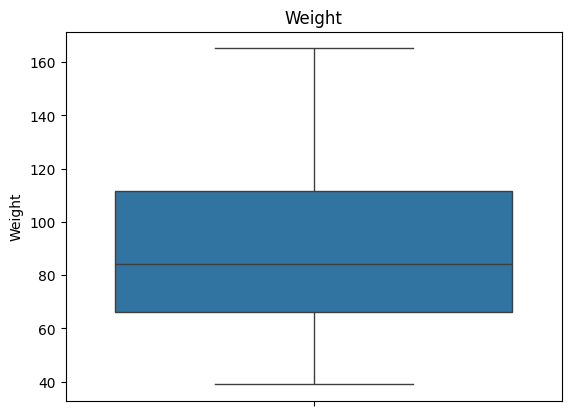

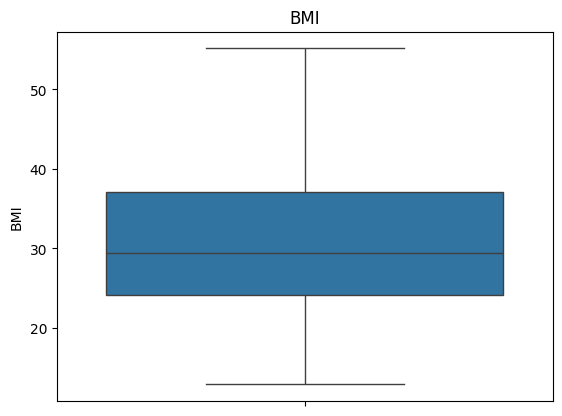

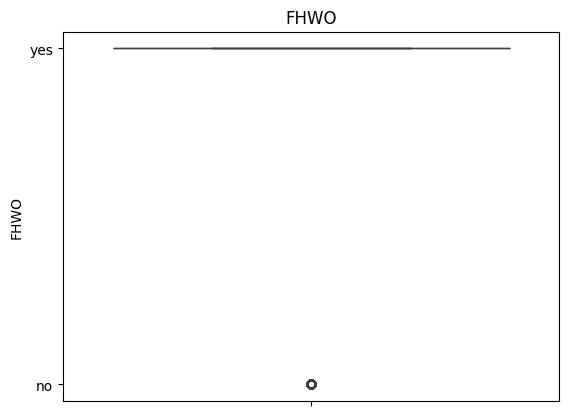

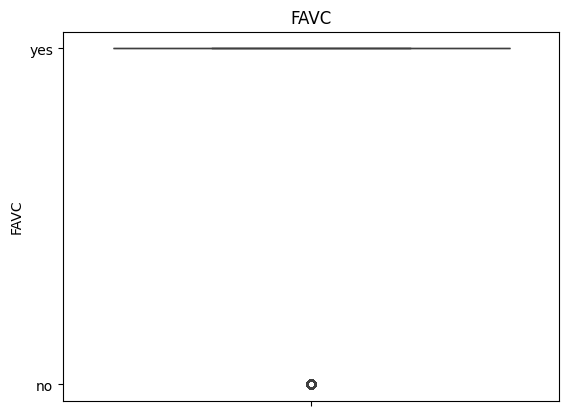

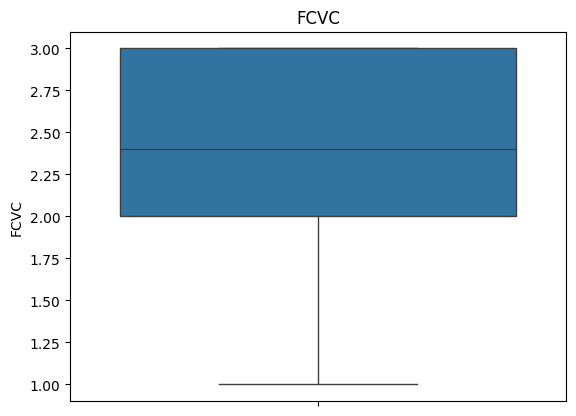

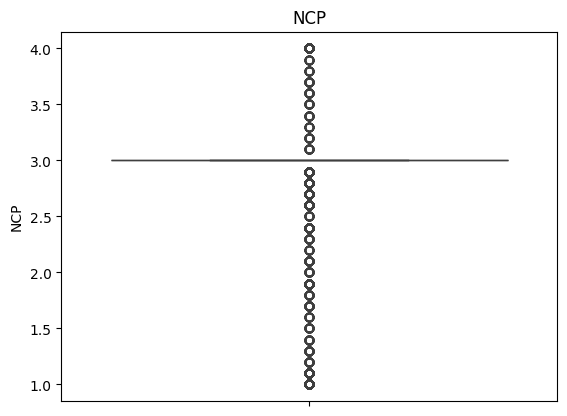

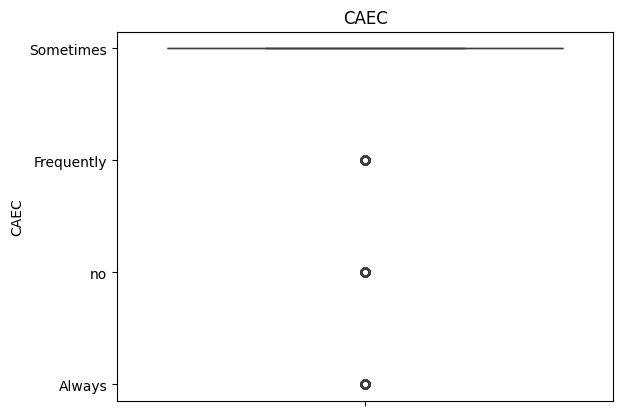

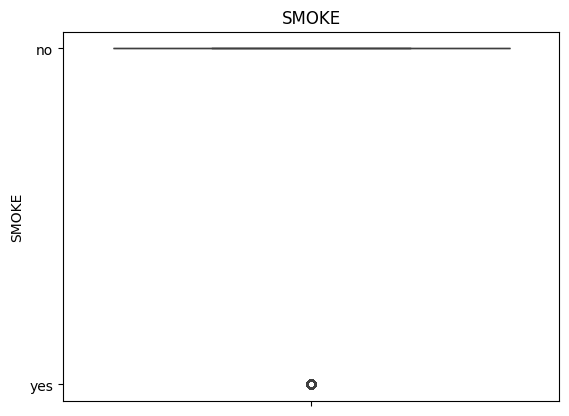

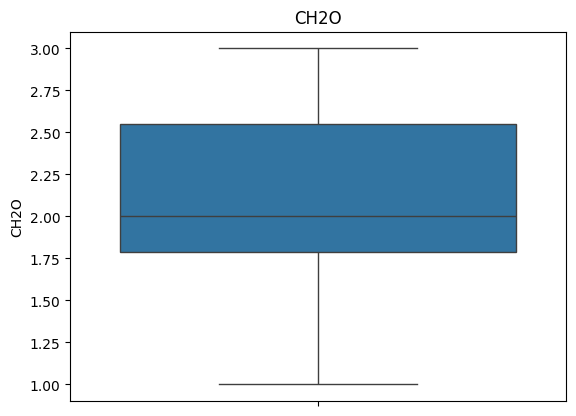

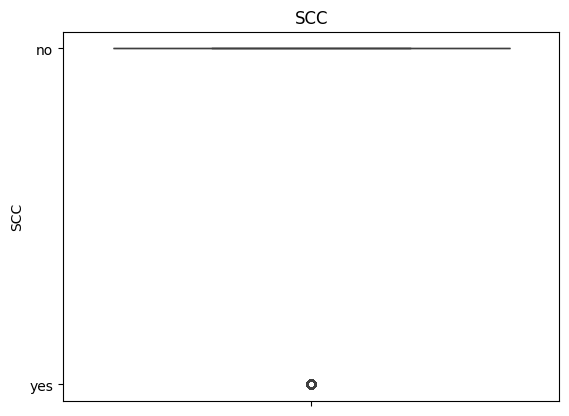

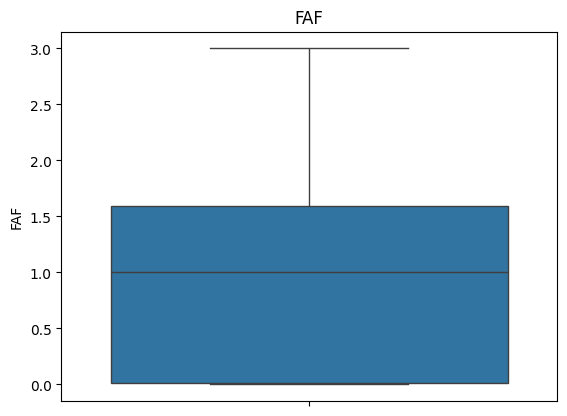

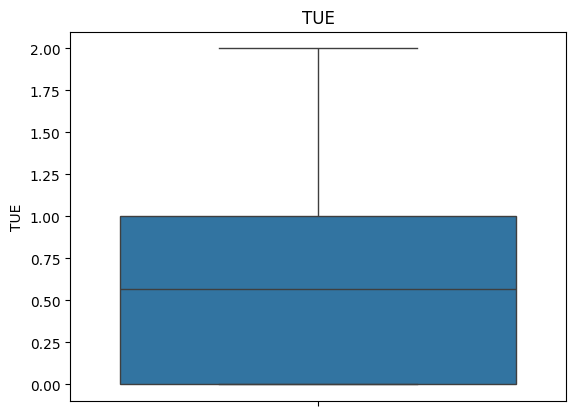

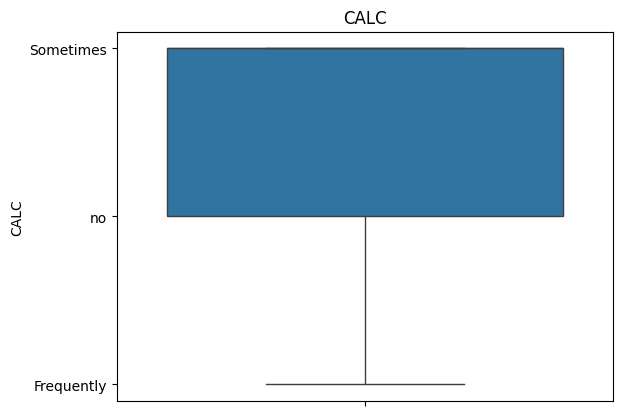

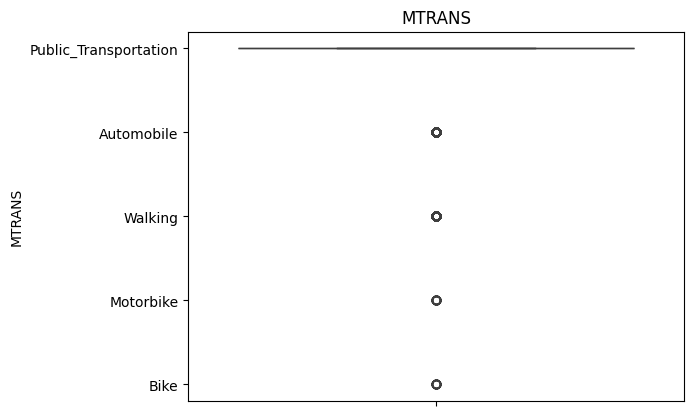

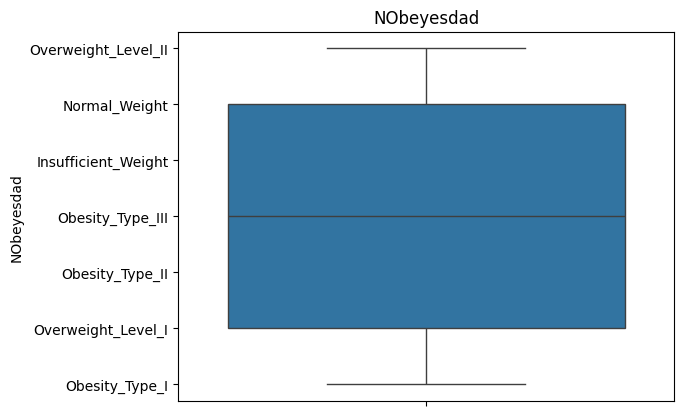

In [ ]:
for i in data.columns:
    sb.boxplot(data[i])
    plt.title(i)
    plt.show()

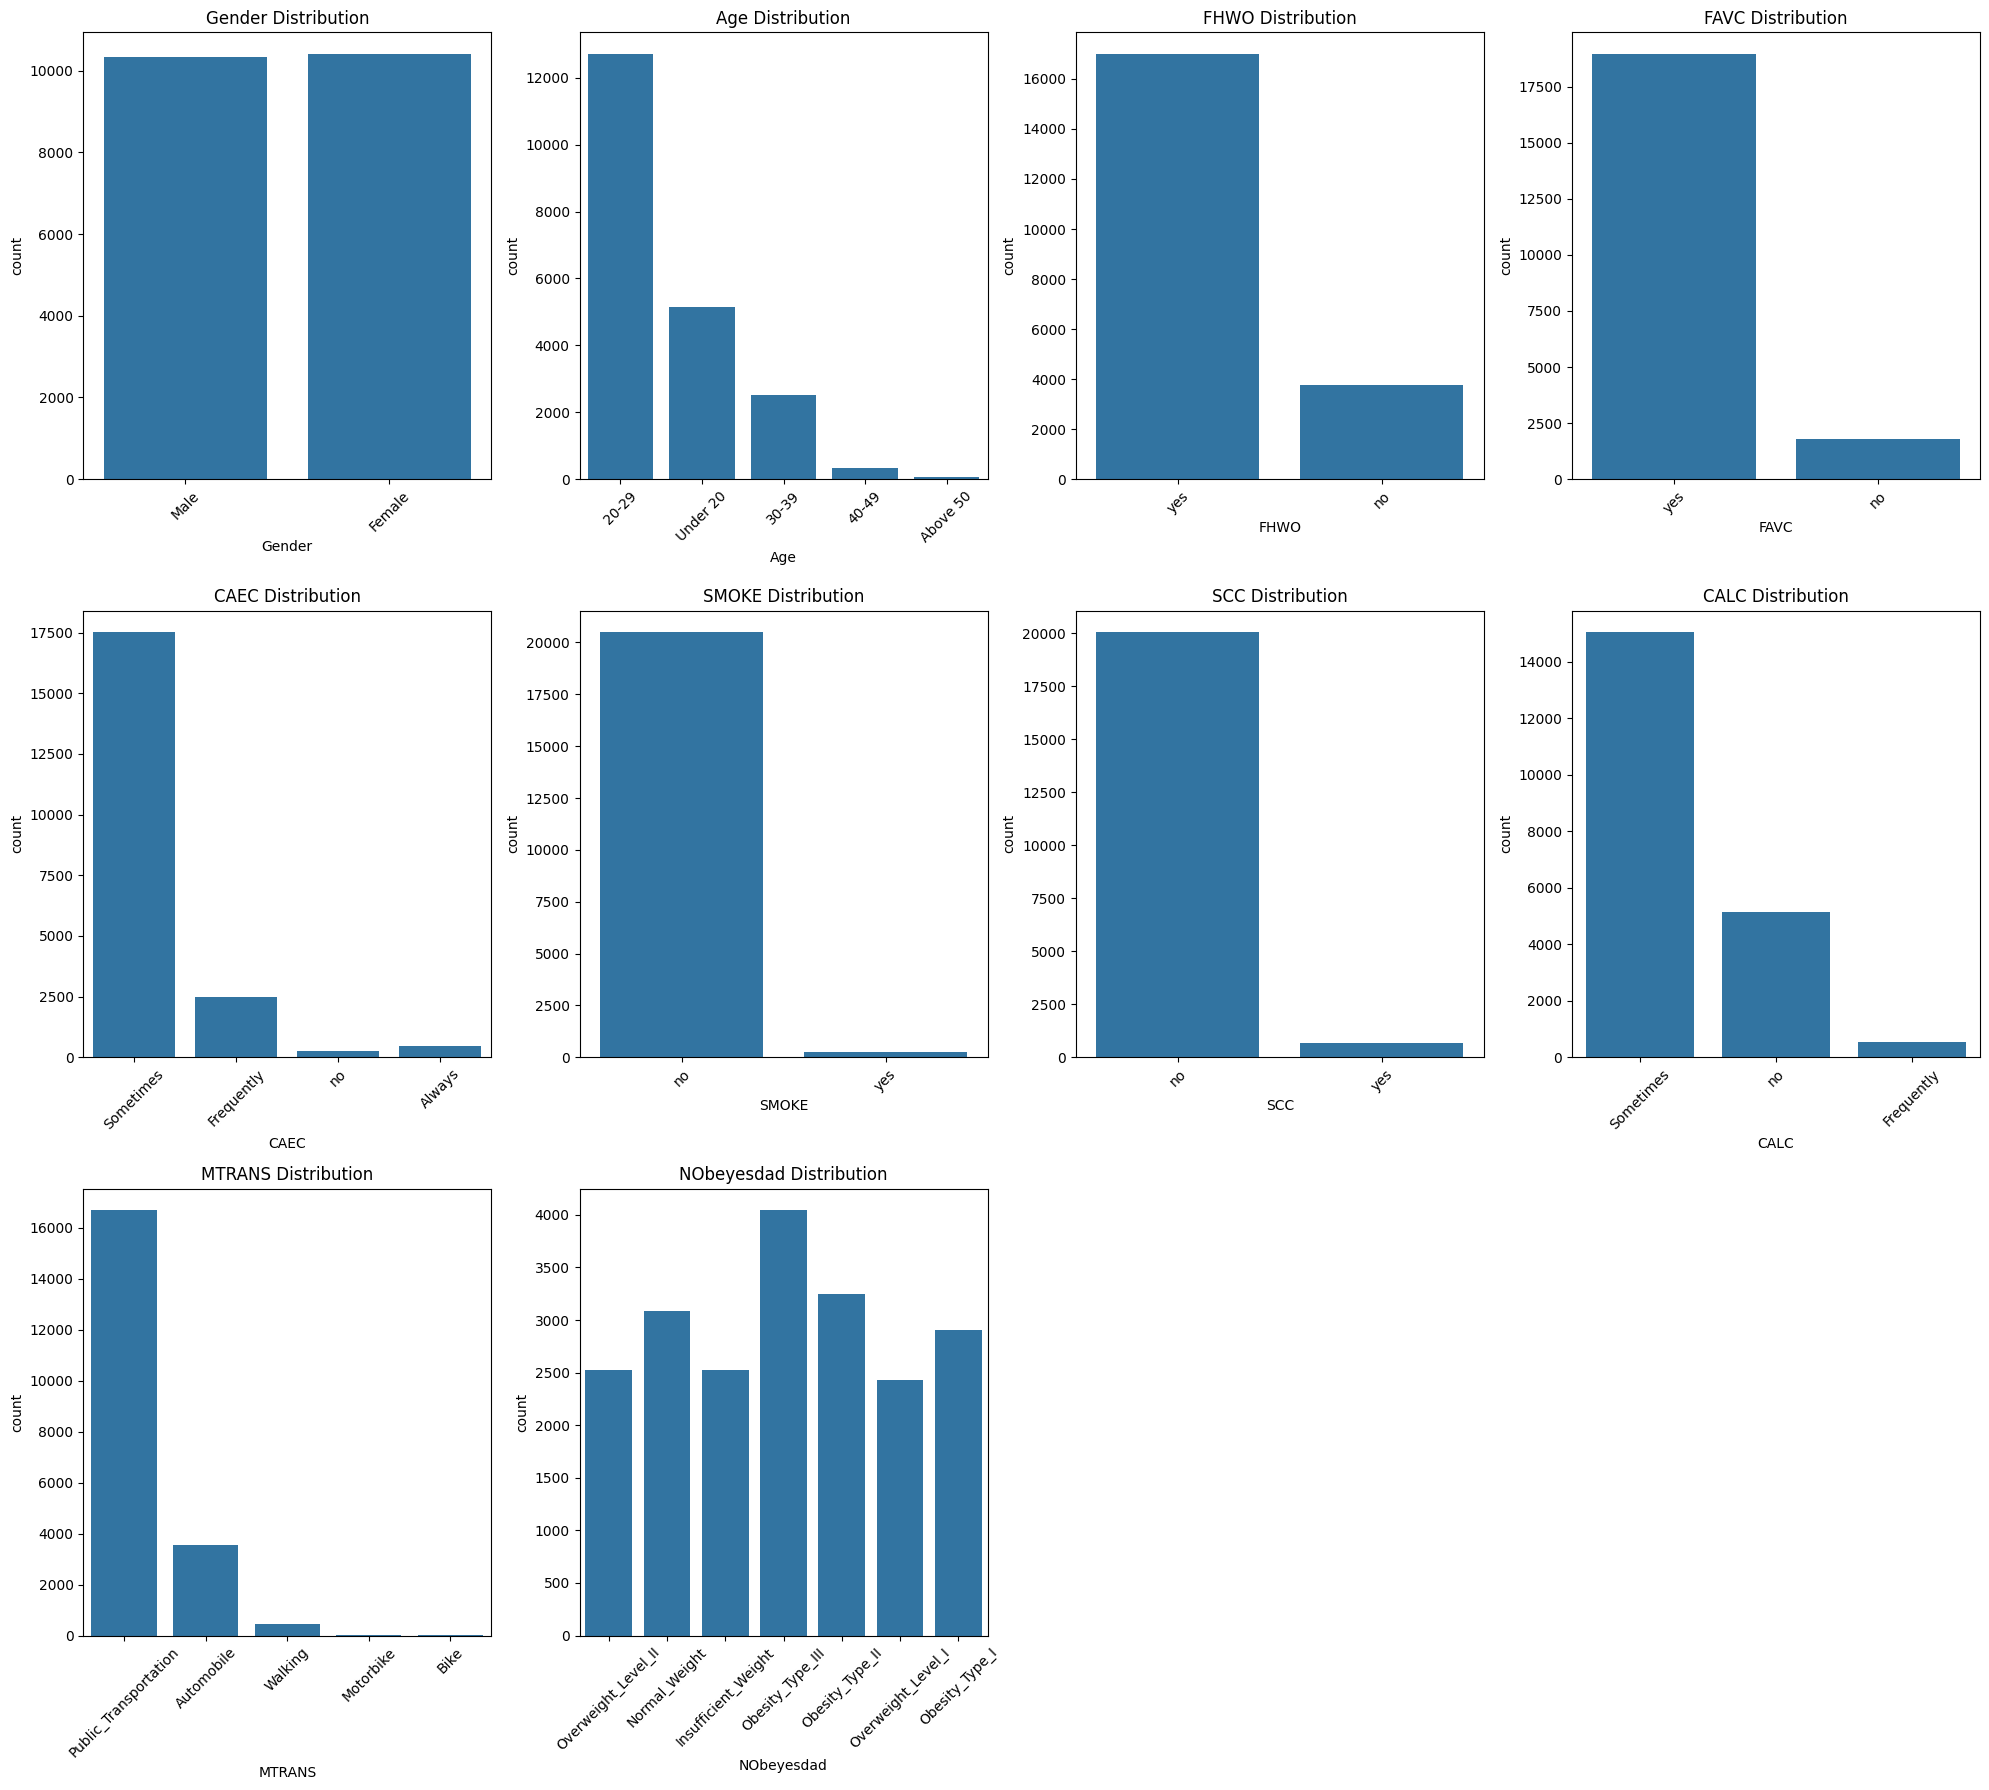

In [ ]:
categorical_columns = ['Gender', 'Age','FHWO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
num_cols = len(categorical_columns)
num_rows = -(-num_cols // 4)

plt.figure(figsize=(20,6 *num_rows))
for i ,col in enumerate(categorical_columns,1):
    plt.subplot(num_rows, 4, i)
    sb.countplot(x= col, data=data)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

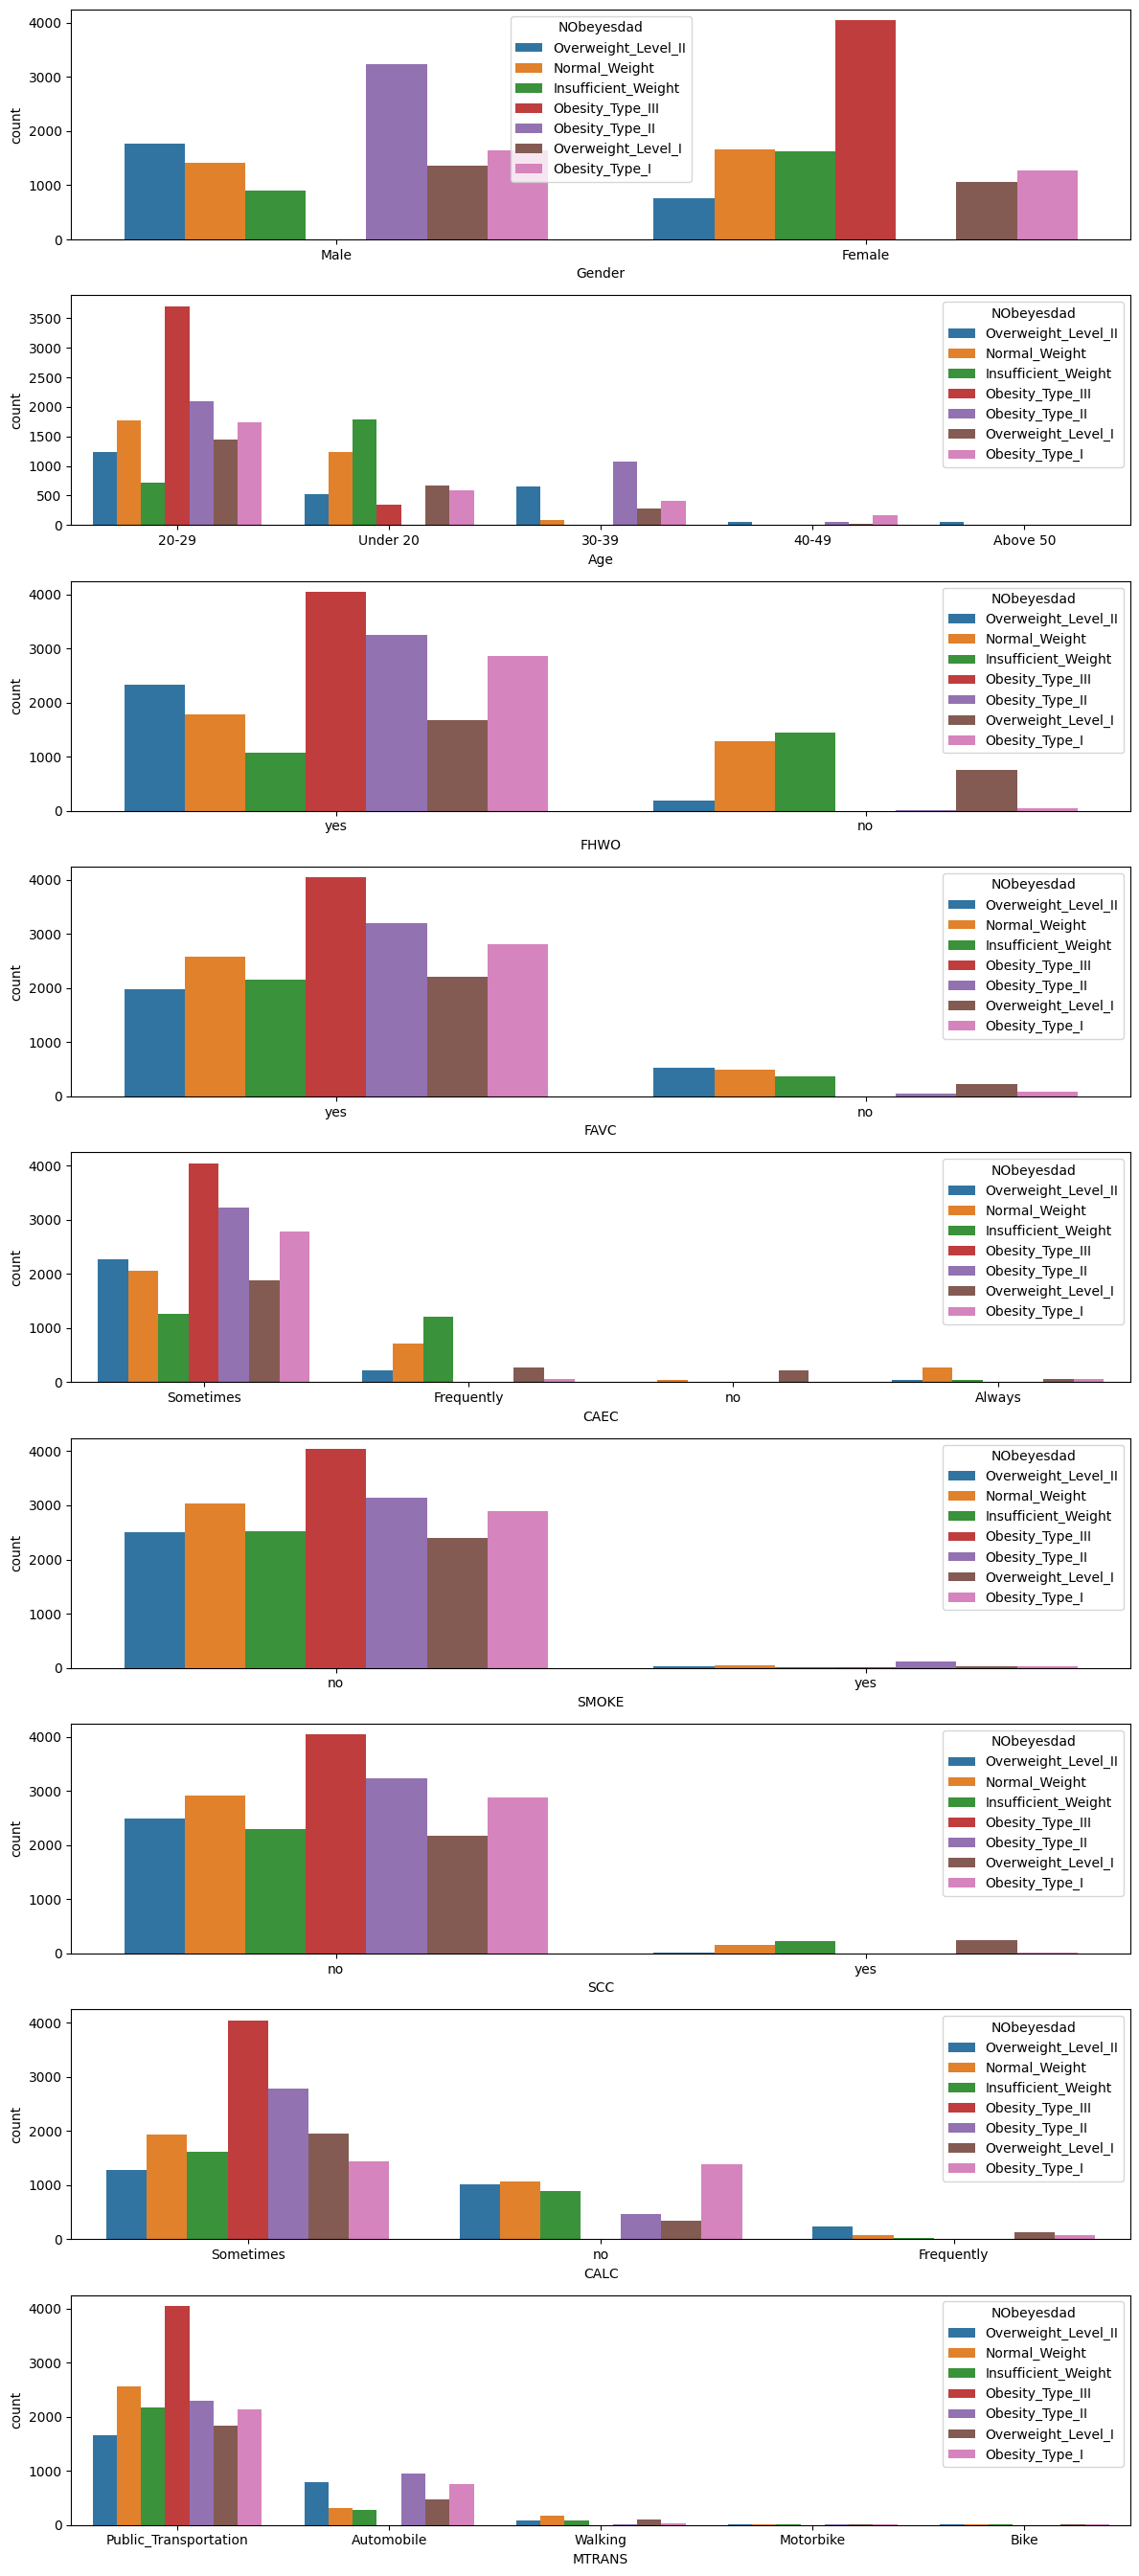

In [ ]:
dataset_cat = data.select_dtypes(include=['category', 'object']).columns

num_rows = len(dataset_cat) - 1

fig, axs = plt.subplots(num_rows, figsize=(12, num_rows * 3))

for i, col in enumerate(dataset_cat[:-1]):
    sb.countplot(x=col, data=data, hue=data['NObeyesdad'], ax=axs[i])

plt.tight_layout()
plt.show()

## Remove outliers

In [ ]:
#Create bounds for the features to remove outliers
quartile = data[["Height", "Weight", "BMI"]].quantile([0.25,0.75])
iqr = quartile.iloc[1] - quartile.iloc[0]
upper = quartile.iloc[1] + 1.5*iqr
lower = quartile.iloc[0] - 1.5*iqr

#Remove outliers from the dataset
data.drop(data[(data["Height"] < lower["Height"]) | (data["Height"] > upper["Height"])].index, inplace=True)
data.drop(data[(data["Weight"] < lower["Weight"]) | (data["Weight"] > upper["Weight"])].index, inplace=True)
data.drop(data[(data["BMI"] < lower["BMI"]) | (data["BMI"] > upper["BMI"])].index, inplace=True)

<ipython-input-193-ecec3ad8e92c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data["Height"] < lower["Height"]) | (data["Height"] > upper["Height"])].index, inplace=True)
<ipython-input-193-ecec3ad8e92c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data["Weight"] < lower["Weight"]) | (data["Weight"] > upper["Weight"])].index, inplace=True)
<ipython-input-193-ecec3ad8e92c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

## Split features with target

In [ ]:
target = 'NObeyesdad'
features = data.columns.drop(target)

#Features
X = data[features]

#Target
y = data[target]

## Split train and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Shape of X_train is {X_train.shape} and y_train is {y_train.shape}')
print(f'Shape of X_test is {X_test.shape} and y_test is {y_test.shape}')
print(type(X_train))

Shape of X_train is (16603, 17) and y_train is (16603,)
Shape of X_test is (4151, 17) and y_test is (4151,)
<class 'pandas.core.frame.DataFrame'>


## Feature scaling and encoding

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def processingData(X, isTest=False):
    #Numeric Data
    X_numeric = X.select_dtypes(include='number')
    numeric = X_numeric.columns

    #Categorical Data
    X_categorical = X.select_dtypes(exclude='number')
    categorical = X_categorical.columns

    # Process Numeric Data
    if not isTest:
        X_numeric = pd.DataFrame(scaler.fit_transform(X_numeric))
    else:
        X_numeric = pd.DataFrame(scaler.transform(X_numeric))

    X_numeric = X_numeric.set_axis(numeric, axis=1)

    # Process Categorical Data
    X_categorical = pd.get_dummies(X_categorical, drop_first = True)
    X_scaled = pd.concat([X_numeric, X_categorical.set_axis(X_numeric.index)], axis=1)
    X_scaled.reset_index(drop=True, inplace=True)
    return X_scaled

X_train = processingData(X_train)
X_test = processingData(X_test, True)
print(X_train)
print(X_test)
print(f'Shape of X_train is {X_train.shape} and y_train is {y_train.shape}')
print(f'Shape of X_test is {X_test.shape} and y_test is {y_test.shape}')

         Height    Weight       BMI      FCVC       NCP      CH2O       FAF  \
0      0.568422 -0.491415 -0.691813  1.039138  0.334952  1.592230  0.023253   
1     -0.578257 -0.681063 -0.545590 -0.834965 -2.493233 -0.052491  0.023253   
2      0.224418 -0.222115 -0.301085 -1.209785  0.334952 -0.266305 -0.012592   
3     -0.578257 -0.870711 -0.764925  1.039138  0.334952 -1.697212  0.023253   
4      0.224418 -1.363795 -1.520013 -0.834965  0.334952 -0.052491 -0.179870   
...         ...       ...       ...       ...       ...       ...       ...   
16598 -0.922261  0.839912  1.400861  1.039138  0.334952  0.605398 -1.159640   
16599 -0.692925  0.881635  1.327749  1.039138  0.334952  1.082367 -1.171588   
16600 -0.578257  0.908185  1.298984  1.039138  0.334952 -1.582082 -1.171588   
16601 -0.578257  0.908185  1.298984  1.039138  0.334952  1.213945 -1.171588   
16602 -0.692925 -1.629302 -1.621890  1.039138  0.334952 -0.134727 -0.359096   

            TUE  Gender_Male  Age_30-39  ...  CAEC_

# Training models

In [ ]:
def plt_confusion_matrix(cm, normalize=False, labels=None, title='Confusion matrix', cmap=plt.cm.Blues, ax=None):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print()
    if labels is not None:
        d = {index: label for index, label in enumerate(labels)}
        print('Index and Its Corresponding Label:')
        print(d)
        print()
    if ax is None:
        ax = plt.gca()
    sb.heatmap(cm, cmap=cmap, annot=True, fmt='d', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predict')
    ax.set_ylabel('Actual')
    plt.tight_layout()

## Random Forest Classifier

Random Forest is an advanced usage of Decision Tree.

#### Recall about Decision Tree

Decision Tree is a method of classification which makes use of a tree with each node describing a condition about some features. When it is trained, all of the samples are passed in and the classification is decided based on gini score. When a sample is passed in for testing, it is compared with each node until it reaches a leaf, from which the classification is decided.

#### How does Random Forest work?

Random Forest makes use of multiple Decision Trees. First of all, the algorithm bootstraps a number of samples and features for each tree. In other words, it selects some samples and features RANDOMLY for training each tree. When a sample is used for testing, it is classified independently by every single tree. Then the classification is aggregated by voting for the majority result. This method of bootstrapping and aggregating is called BAGGING.

#### How to evaluate its accuracy?

Typically, there are a number of samples that is not included in the bootstrapping. They are called Out-of-Bag dataset. The accuracy of a Random Forest model is measured by the proportion of Out-of-Bag samples that were correctly classified by the model.

#### How to optimize its accuracy?

We can try to increase the accuracy score by tuning the hyperparameters. For example, we can decide on the number of trees so that the algorithm can create for training.

Reference:

https://www.youtube.com/watch?si=tCa5kLpL8RsDoH8C&v=v6VJ2RO66Ag&feature=youtu.be

https://www.youtube.com/watch?si=57QwNp3Z-iouAkbh&v=_QuGM_FW9eo&feature=youtu.be

--------------TEST DATASET---------------
ACCURACY: 0.8976150325222838
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.93       488
      Normal_Weight       0.86      0.90      0.88       615
     Obesity_Type_I       0.91      0.87      0.89       591
    Obesity_Type_II       0.96      0.97      0.97       656
   Obesity_Type_III       1.00      1.00      1.00       794
 Overweight_Level_I       0.81      0.74      0.77       532
Overweight_Level_II       0.75      0.79      0.77       475

           accuracy                           0.90      4151
          macro avg       0.89      0.89      0.89      4151
       weighted avg       0.90      0.90      0.90      4151

Confusion matrix, without normalization

Index and Its Corresponding Label:
{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Lev

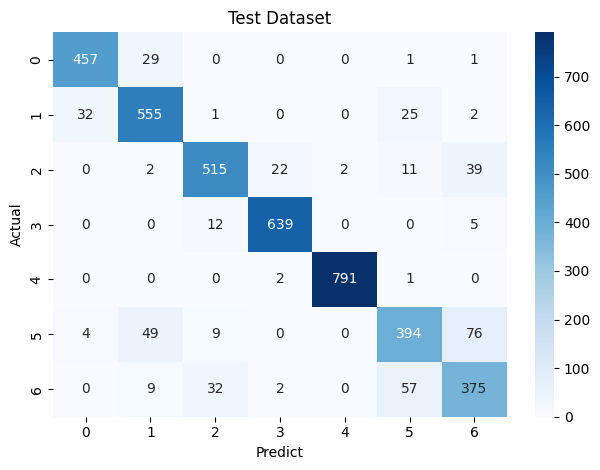

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=198, random_state=42)
clf.fit(X_train, y_train)
labels_clf = clf.classes_

print('--------------TEST DATASET---------------')

print("ACCURACY:", clf.score(X_test, y_test))
y_test_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

cm_clf_test = confusion_matrix(y_test, y_test_pred)
plt_confusion_matrix(cm_clf_test, title='Test Dataset', labels=labels_clf)

As shown, the model has a high accuracy in predicting the target from the dataset

## XGBoost

#### What is XGBoost

XGBoost is a machine learning algorithm known for its speed and performance in handling structured data.It works by building an ensemble of weak decision trees sequentially, where each subsequent tree corrects the errors of the previous ones. This iterative process allows XGBoost to continuously improve its predictive accuracy. XGBoost is particularly effective for classification problems due to its ability to handle complex relationships in the data, handle missing values, and prevent overfitting.

#### How to optimize its accuracy?

We can try to increase the accuracy score by tuning the hyperparameters.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:49:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


--------------TEST DATASET---------------
ACCURACY: 0.9021922428330523
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.93       488
      Normal_Weight       0.86      0.90      0.88       615
     Obesity_Type_I       0.89      0.88      0.89       591
    Obesity_Type_II       0.97      0.97      0.97       656
   Obesity_Type_III       1.00      1.00      1.00       794
 Overweight_Level_I       0.83      0.75      0.79       532
Overweight_Level_II       0.77      0.82      0.79       475

           accuracy                           0.90      4151
          macro avg       0.89      0.89      0.89      4151
       weighted avg       0.90      0.90      0.90      4151

Confusion matrix, without normalization



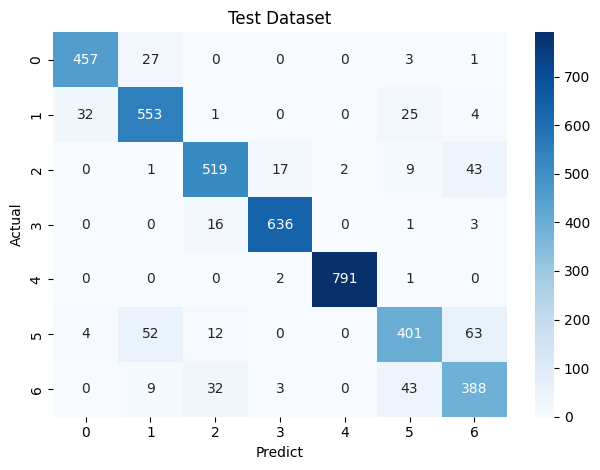

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

label_encoder =  LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1)
# Choose max_depth = 5 because it gives the best accuracy score
xgb.fit(X_train, y_train_encoded)


print('--------------TEST DATASET---------------')

test_pred_index_xg = xgb.predict(X_test)
test_pred_label_xg = label_encoder.inverse_transform(test_pred_index_xg)
print("ACCURACY:", accuracy_score(y_test_encoded, test_pred_index_xg))
print("Classification Report:")
print(classification_report(y_test, test_pred_label_xg))

cm_xg_test = confusion_matrix(y_test, test_pred_label_xg)
plt_confusion_matrix(cm_xg_test, title='Test Dataset')